<a href="https://colab.research.google.com/github/SameerAha-007/machine-learning/blob/ml/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only &quot;../input/&quot; directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('kaggle/input'):
   for filename in filenames:
      print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
%matplotlib inline
#  Load data set
df = pd.read_csv('/content/minihomeprices.csv')

df.head()


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [4]:
# Descriptiion of our data set
df.describe().style.background_gradient(cmap='CMRmap')


,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [5]:
# Descriptiion of our data set
df.isna().sum()


area        0
bedrooms    1
age         0
price       0
dtype: int64

In [6]:
# fill null values with median value
df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )


In [7]:
#  here we can use inplace=True as well.  both are valid for update data frame
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


<Figure size 1000x700 with 0 Axes>

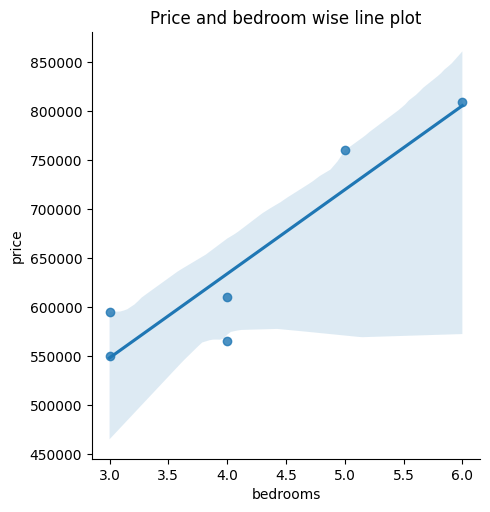

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes
   area  bedrooms  age
0  2600         3   20
1  3000         4   15
2  3200         4   18
3  3600         3   30
4  4000         5    8
5  4100         6    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


LinearRegression()

In [11]:
plt.figure(figsize=(10, 7))
sns.lmplot(x='bedrooms', y='price', data=df);
plt.title("Price and bedroom wise line plot")
plt.show()
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
#  Set dependent and independent variables
X = df.drop(['price'], axis=1)
y = df['price']
df['bedrooms'] = df['bedrooms'].astype('int64')
df.info() #  shows the variables
print(X)
print('-' * 25)
print(y)
mdl.fit(X, y)